## UN Data Exploration

This is my first comment on this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

For later # pd.read_csv("../data/continents.csv")

In [2]:
gdp_df = pd.read_csv("../data/gdp_per_capita.csv")

In [3]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
5,Afghanistan,2016,2101.422187,NaN
6,Afghanistan,2015,2108.714173,NaN
7,Afghanistan,2014,2144.449634,NaN
8,Afghanistan,2013,2165.340915,NaN
9,Afghanistan,2012,2122.830759,NaN


In [4]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
7652,Zimbabwe,1999,2866.032886,NaN
7653,Zimbabwe,1998,2931.725144,NaN
7654,Zimbabwe,1997,2896.147308,NaN
7655,Zimbabwe,1996,2867.026043,NaN
7656,Zimbabwe,1995,2641.378271,NaN
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


remove the Value footnotes column and rename the other columns to "Country", "Year", and "GDP_Per_capita"

In [5]:
gdp_df = (
    gdp_df
    .rename(columns={"Country or Area" : "Country", "Value" : "GDP_Per_capita"})
    .drop('Value Footnotes', axis=1)
)

How many rows and columns does gdp_df have? What are the data types of its columns? There are 7,662 rows, and 3 columns (once value footnotes is removed). Country is nominal categorical, Year is ordinal categorical, and value is continuous numerical.

In [6]:
gdp_df['Year'] = pd.to_datetime(gdp_df['Year'], format = '%Y', errors='coerce').dt.to_period('Y')

In [7]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype        
---  ------          --------------  -----        
 0   Country         7662 non-null   object       
 1   Year            7662 non-null   period[Y-DEC]
 2   GDP_Per_capita  7662 non-null   float64      
dtypes: float64(1), object(1), period[Y-DEC](1)
memory usage: 179.7+ KB


Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice? The years are 1990 to 2022. The number of observations is the lowest in 1990 and goes up into the 2000s and 2010s capping at 2013 before going back down a little in 2021.

In [8]:
gdp_df["Year"].min()

Period('1990', 'Y-DEC')

In [9]:
gdp_df["Year"].max()

Period('2022', 'Y-DEC')

In [10]:
gdp_df["Year"].value_counts()

Year
2013    242
2016    242
2014    242
2015    242
2020    242
2017    242
2018    242
2019    242
2021    241
2012    240
2011    240
2010    239
2009    239
2008    238
2007    237
2006    237
2004    236
2005    236
2003    235
2002    235
2001    234
2000    233
2022    232
1999    227
1998    226
1997    226
1996    223
1995    223
1994    213
1993    211
1992    210
1991    208
1990    207
Freq: Y-DEC, Name: count, dtype: int64

How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations? There are 242 countries. The least represented are the Middle Eastern and African countries. I think this would be due to these countries being less developed, nd thus having less data collection organizations.

In [11]:
gdp_df['Country'].nunique()

242

In [12]:
gdp_df['Country'].value_counts()

Country
Least developed countries: UN classification    33
Middle East & North Africa                      33
Middle East & North Africa (IDA & IBRD)         33
Middle income                                   33
Mongolia                                        33
                                                ..
Kosovo                                          15
Sint Maarten (Dutch part)                       14
Turks and Caicos Islands                        12
Somalia                                         10
Djibouti                                        10
Name: count, Length: 242, dtype: int64

Create a new dataframe by subsetting gdp_df to just the year 2021. Call this new dataframe gdp_2021.

In [13]:
gdp_2021 = gdp_df.loc[gdp_df["Year"] == '2021']

In [14]:
gdp_2021.describe()

,GDP_Per_capita
count,241.000000
mean,20711.570080
std,20916.978968
min,714.066712
25%,5044.196028
50%,13754.802423
75%,30974.370692
max,115683.493708


Create a histogram of GDP Per Capita numbers for 2021 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution? It is unimodal with a heavy right skew. 

array([[<Axes: title={'center': 'GDP_Per_capita'}>]], dtype=object)

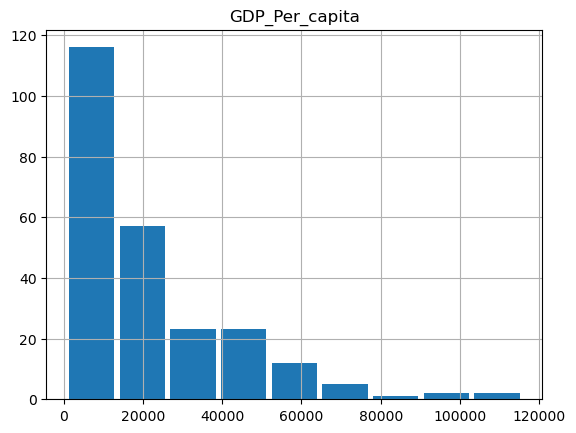

In [15]:
gdp_2021.hist(bins=9, rwidth=0.9)

Find the top 5 counties and bottom 5 countries by GDP per capita in 2021.

In [31]:
gdp_2021.sort_values('GDP_Per_capita', ascending = False).head(5)

,Country,Year,GDP_Per_capita
4147,Luxembourg,2021,115683.493708
6107,Singapore,2021,107741.118436
3278,Ireland,2021,102785.490239
5745,Qatar,2021,92862.571798
680,Bermuda,2021,78570.489515


In [30]:
gdp_2021.sort_values('GDP_Per_capita', ascending = False).tail(5)

,Country,Year,GDP_Per_capita
5073,Niger,2021,1186.576809
6272,Somalia,2021,1136.735989
1629,Dem. Rep. Congo,2021,1073.643271
1216,Central African Republic,2021,837.504686
972,Burundi,2021,714.066712


Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2021 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2021. Save the result to a dataframe named gdp_pivoted

In [37]:
gdp_pivoted = pd.pivot_table(gdp_df, values = ['GDP_Per_capita'], index = ['Country'], columns = ['Year'])

In [40]:
gdp_pivoted

GDP_Per_capita                            \
Year                                  1990         1991         1992   
Country                                                                
Afghanistan                            NaN          NaN          NaN   
Africa Eastern and Southern    3037.297466  2955.642238  2823.940366   
Africa Western and Central     2788.301039  2750.790764  2743.855561   
Albania                        4827.027705  3496.369626  3264.820757   
Algeria                        8828.874473  8517.376962  8471.527605   
...                                    ...          ...          ...   
Viet Nam                       2099.394649  2177.473744  2317.266668   
West Bank and Gaza                     NaN          NaN          NaN   
World                          9705.981267  9669.677060  9665.890260   
Zambia                         2290.039226  2232.837441  2141.504615   
Zimbabwe                       2704.757299  2781.787843  2468.278257   

                                                                    \
Year                                1993         1994         1995   
Country                                                              
Afghanistan                          NaN          NaN          NaN   
Africa Eastern and Southern  2737.731240  2715.131116  2764.305017   
Africa Western and Central   2644.709683  2575.064177  2561.665446   
Albania                      3598.810267  3921.614970  4471.601702   
Algeria                      8109.883559  7869.270272  8013.123442   
...                                  ...          ...          ...   
Viet Nam                     2455.508783  2623.720022  2825.016443   
West Bank and Gaza                   NaN  3951.205493  4047.128488   
World                        9675.232260  9799.764965  9957.172695   
Zambia                       2232.710379  1991.185925  1999.356842   
Zimbabwe                     2458.783255  2670.106615  2641.378271   

                                                                       \
Year                                 1996          1997          1998   
Country                                                                 
Afghanistan                           NaN           NaN           NaN   
Africa Eastern and Southern   2838.692029   2886.566235   2867.960243   
Africa Western and Central    2612.194795   2654.384927   2676.529845   
Albania                       4908.932392   4400.312754   4819.067832   
Algeria                       8195.860480   8147.878198   8435.035658   
...                                   ...           ...           ...   
Viet Nam                      3039.938041   3239.681646   3378.904834   
West Bank and Gaza            3916.925775   4294.746098   4786.480236   
World                        10179.565344  10424.112458  10532.457767   
Zambia                        2071.708828   2096.294593   2034.897183   
Zimbabwe                      2867.026043   2896.147308   2931.725144   

                                           ...                              \
Year                                 1999  ...          2013          2014   
Country                                    ...                               
Afghanistan                           NaN  ...   2165.340915   2144.449634   
Africa Eastern and Southern   2873.553735  ...   3593.299065   3642.875373   
Africa Western and Central    2649.555854  ...   4026.231916   4146.994622   
Albania                       5474.849914  ...  11361.252492  11586.817446   
Algeria                       8584.071496  ...  11360.637612  11561.259795   
...                                   ...  ...           ...           ...   
Viet Nam                      3495.097968  ...   7257.729273   7641.909252   
West Bank and Gaza            5052.064072  ...   6118.257181   5967.073437   
World                        10754.895302  ...  14801.332173  15120.730322   
Zambia                        2074.453663  ...   3330.876903   3375.941270   
Z